# Task 1 - Data Acquisition and Preparation

In [2]:
# import pandas as pd used for doing data modeling, data analysis and data manipulation
# Making table for data
# import numpy because tells Python to give NumPy the alias of np
# import statistics to use mode and mean value
import pandas as pd
import numpy as np
import statistics

# Read data make into table
data1 = pd.read_csv("/Users/chester/Documents/KMITL/Python/Robotics Lab/Semester II/Assignment 1/data1.csv", sep = ";", skipinitialspace=True)
df1 = pd.DataFrame(data1)

data2 = pd.read_csv("/Users/chester/Documents/KMITL/Python/Robotics Lab/Semester II/Assignment 1/data2.csv", sep = ";", skipinitialspace=True)
df2 = pd.DataFrame(data2)

data3 = pd.read_csv("/Users/chester/Documents/KMITL/Python/Robotics Lab/Semester II/Assignment 1/data3.csv", sep = ";", skipinitialspace=True)
df3 = pd.DataFrame(data3)

# Merge data 1 and data 2 (Using merge) = data 4
df4 = df1.merge(df2, on = "ID", how = 'outer')

# Merge data 4 and data 3 (Using concat) = data 5
df5 = pd.concat([df3, df4])

# Set the min and max value for data (Using for to create the range of min and max in each column)
for column_name, row_value in df5.items():
    for row_index, value in row_value.items():
        impossible_value = True if (column_name == "ID" and (value < 1 or value > 5000)) or (column_name == "Marital status" and (value < 1 or value > 6))\
            or (column_name == "Application mode" and (value < 1 or value > 60)) or (column_name == "Application order" and (value < 0 or value > 9))\
                or (column_name == "Course" and (value < 10 or value > 10000))\
                    or (column_name == "Previous qualification" and (value < 1 or value > 45)) or (column_name == "Previous qualification (grade)" and (value < 95 or value > 190))\
                        or (column_name == "Nationality" and (value < 1 or value > 109)) or (column_name == "Mother's qualification" and (value < 1 or value > 45))\
                            or (column_name == "Mother's occpation" and (value < 0 or value > 200))\
                                or (column_name == "Father's occupation" and (value < 0 or value > 200)) or (column_name == "Admission grade" and (value < 95 or value > 190))\
                                    or (column_name == "Displaced" and (value < 0 or value > 1)) or (column_name == "Educational special needs" and (value < 0 or value > 1))\
                                        or (column_name == "Debtor" and (value < 0 or value > 1)) or (column_name == "Tuition fees up to date" and (value < 0 or value > 1))\
                                            or (column_name == "Gender" and (value < 0 or value > 1)) or (column_name == "Scholarship holder" and (value < 0 or value > 1))\
                                                or (column_name == "Age at enrollment" and (value < 17 or value > 70)) or (column_name == "International" and (value < 0 or value > 1))\
                                                    or (column_name == "Curricular units 1st sem (credited)" and (value < 0 or value > 50)) or (column_name == "Curricular units 1st sem (enrolled)" and (value < 0 or value > 50))\
                                                        or (column_name == "Curricular units 1st sem (evaluations)" and (value < 0 or value > 50)) or (column_name == "Curricular units 1st sem (approved)" and (value < 0 or value > 50))\
                                                            or (column_name == "Curricular units 1st sem (grade)" and (value < 0 or value > 20)) or (column_name == "Curricular units 1st sem (without evaluations)" and (value < 0 or value > 50))\
                                                                or (column_name == "Curricular units 2st sem (credited)" and (value < 0 or value > 50)) or (column_name == "Curricular units 2st sem (enrolled)" and (value < 0 or value > 50))\
                                                                    or (column_name == "Curricular units 2st sem (evaluations)" and (value < 0 or value > 50)) or (column_name == "Curricular units 2st sem (approved)" and (value < 0 or value > 50))\
                                                                        or (column_name == "Curricular units 2st sem (grade)" and (value < 0 or value > 20)) or (column_name == "Curricular units 2st sem (without evaluations)" and (value < 0 or value > 12))\
                                                                            or (column_name == "Unemployment rate" and (value < -100 or value > 100)) or (column_name == "Inflation rate" and (value < -100 or value > 100))\
                                                                                or (column_name == "GDP" and (value < -100 or value > 100)) or (column_name == "Target" and (value != "Dropout" and value != "Enrolled" and value != "Graduate"))\
        else False

# Change the impossible value into missing value
        if impossible_value == True:
            df5.loc[row_index, column_name] = np.nan

# Set the min and max value of Father's qualification and Daytime/evening attendance
for column_name, row_value in df5.items():
    for row_index, value in row_value.items():
        # Change value of Father's qualification and Daytime/evening attendance into float
        df5["Daytime/evening attendance"] = df5["Daytime/evening attendance"].replace("Y", np.nan)
        df5["Daytime/evening attendance"] = df5["Daytime/evening attendance"].astype(float)
        df5["Father's qualification"].astype(float)
        impossible_value2 = True if (column_name == "Daytime/evening attendance" and (value < 0 or value > 1))\
            or (column_name == "Father's qualification" and (value < 1 or value > 45))\
        else False

# Change the impossible value into missing value
        if impossible_value2 == True:
            df5.loc[row_index, column_name] = np.nan

# Checking the data (Have missing data more than 50% or not)
for column_name, missing_value in df5.isnull().sum().items():
    break
    print(column_name)
    print(missing_value)
# Don't have any column that have more than 50%

# Data that have missing value
# Daytime/evening attendance = 7
# Father's qualification = 1
# Tuition fees up to date = 864
# Age at enrollment = 41
# International = 977
# Target = 12

# Clean the missing data with statistics
df5["Daytime/evening attendance"] = df5["Daytime/evening attendance"].replace(np.nan, statistics.mode(df5["Daytime/evening attendance"]))
df5["Father's qualification"] = df5["Father's qualification"].replace(np.nan, statistics.mode(df5["Father's qualification"]))
df5["Tuition fees up to date"] = df5["Tuition fees up to date"].replace(np.nan, statistics.mode(df5["Tuition fees up to date"]))
df5["Age at enrollment"] = df5["Age at enrollment"].replace(np.nan, statistics.mean(df5["Age at enrollment"]))
df5["International"] = df5["International"].replace(np.nan, statistics.mode(df5["International"]))
df5["Target"] = df5["Target"].replace(np.nan, statistics.mode(df5["Target"]))

# Checking missing value (Still ahve or not)
for column_name, missing_value in df5.isnull().sum().items():
    print(column_name)
    print(missing_value)
# Don't have any missing value



ID
0
Marital status
0
Application mode
0
Application order
0
Course
0
Daytime/evening attendance
0
Previous qualification
0
Previous qualification (grade)
0
Nationality
0
Mother's qualification
0
Father's qualification
0
Mother's occupation
0
Father's occupation
0
Admission grade
0
Displaced
0
Educational special needs
0
Debtor
0
Tuition fees up to date
0
Gender
0
Scholarship holder
0
Age at enrollment
41
International
0
Curricular units 1st sem (credited)
0
Curricular units 1st sem (enrolled)
0
Curricular units 1st sem (evaluations)
0
Curricular units 1st sem (approved)
0
Curricular units 1st sem (grade)
0
Curricular units 1st sem (without evaluations)
0
Curricular units 2nd sem (credited)
0
Curricular units 2nd sem (enrolled)
0
Curricular units 2nd sem (evaluations)
0
Curricular units 2nd sem (approved)
0
Curricular units 2nd sem (grade)
0
Curricular units 2nd sem (without evaluations)
0
Unemployment rate
0
Inflation rate
0
GDP
0
Target
0


# Task 2 - Data Exploration

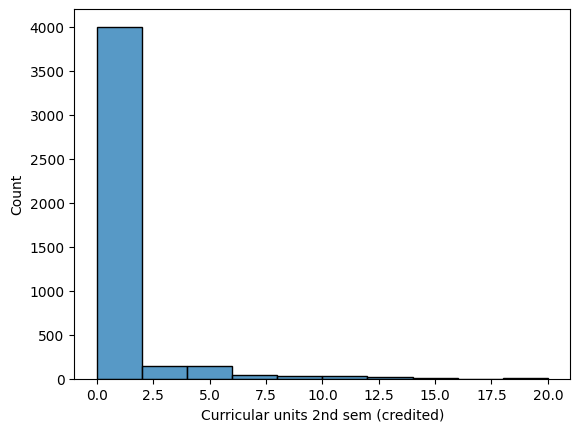

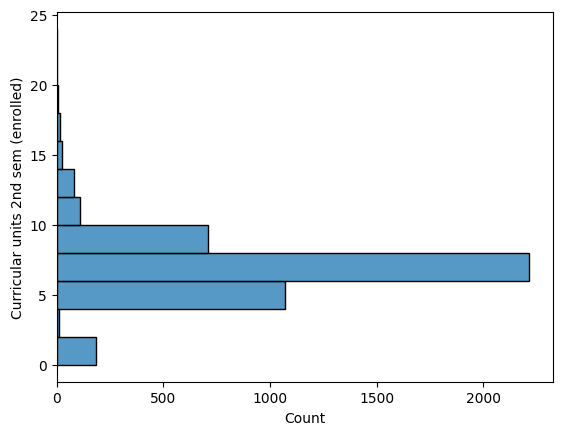

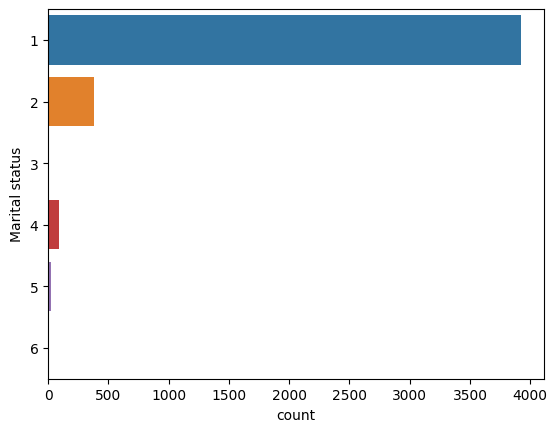

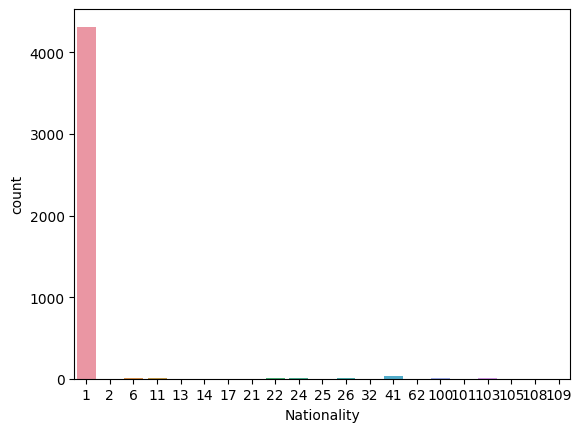

                ID  Marital status  Application mode  Application order  \
count  4424.000000     4424.000000       4424.000000        4424.000000   
mean   2212.500000        1.178571         18.669078           1.727848   
std    1277.243125        0.605747         17.484682           1.313793   
min       1.000000        1.000000          1.000000           0.000000   
25%    1106.750000        1.000000          1.000000           1.000000   
50%    2212.500000        1.000000         17.000000           1.000000   
75%    3318.250000        1.000000         39.000000           2.000000   
max    4424.000000        6.000000         57.000000           9.000000   

            Course  Daytime/evening attendance  Previous qualification  \
count  4424.000000                 4424.000000             4424.000000   
mean   8856.642631                    0.890823                4.577758   
std    2063.566416                    0.311897               10.216592   
min      33.000000          

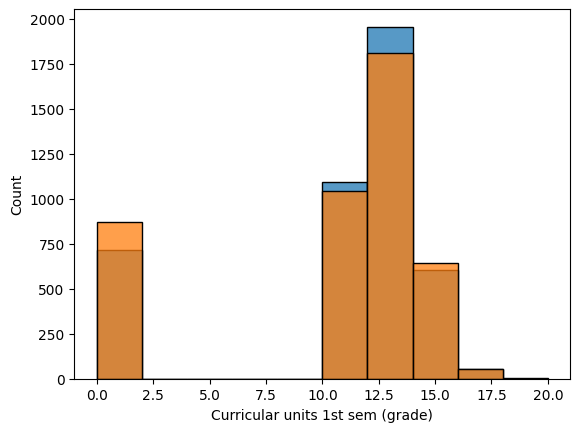

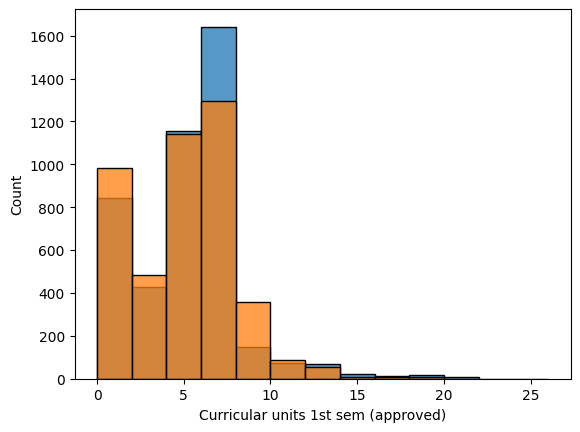

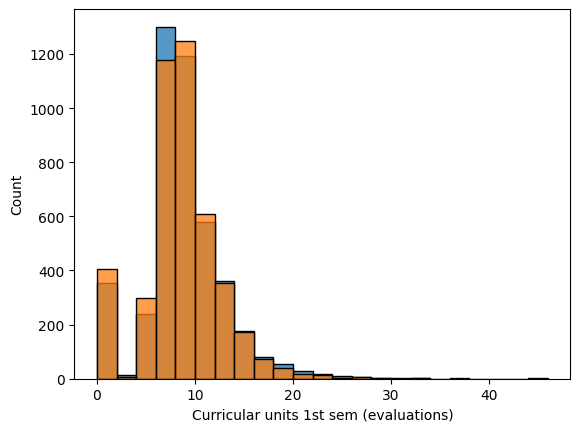

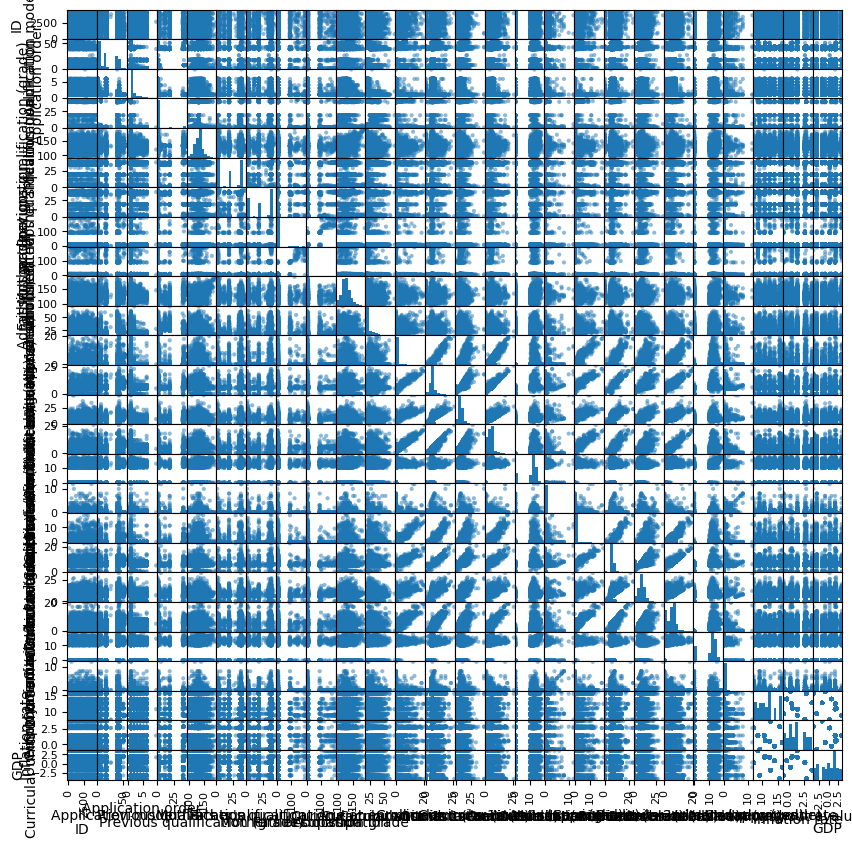

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# corr_matrix = df5.corr()
# corr_matrix.style.background_gradient()

# Numerical
# Curricular units 2nd sem (credited)
# Curricular units 2nd sem (enrolled)
# Categorical
# Marital status
# Nationality

# Visualize numerical
sns.histplot(data=df5, x="Curricular units 2nd sem (credited)", binwidth=2)
plt.show()
sns.histplot(data=df5, y="Curricular units 2nd sem (enrolled)", binwidth=2)
plt.show()

# Visualize categorical
sns.countplot(data=df5, y="Marital status")
plt.show()
sns.countplot(data=df5, x="Nationality")
plt.show()

print(df5.describe())

# Curricular units 1st sem (grade)
# Curricular units 2nd sem (grade)
# Curricular units 1st sem (approved)
# Curricular units 2nd sem (approved)
# Curricular units 1st sem (evaluations)
# Curricular units 2nd sem (evaluations)

# Visualize grade
sns.histplot(data=df5, x="Curricular units 1st sem (grade)", binwidth=2)
sns.histplot(data=df5, x="Curricular units 2nd sem (grade)", binwidth=2)
plt.show()

# Visualize approved
sns.histplot(data=df5, x="Curricular units 1st sem (approved)", binwidth=2)
sns.histplot(data=df5, x="Curricular units 2nd sem (approved)", binwidth=2)
plt.show()

# Visualize evaluations
sns.histplot(data=df5, x="Curricular units 1st sem (evaluations)", binwidth=2)
sns.histplot(data=df5, x="Curricular units 2nd sem (evaluations)", binwidth=2)
plt.show()

# Scatter matrix
column_name_sm = ['ID', 'Application mode', 'Application order', 'Previous qualification', 'Previous qualification (grade)', "Mother's qualification",
"Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Age at enrollment', 'Curricular units 1st sem (credited)',
'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)',
'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 
'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 
'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP', 'Target']

# Create the scatter matrix
df5[column_name_sm].iloc[0:10, :]
pd.plotting.scatter_matrix(df5[column_name_sm], figsize=(10,10))
plt.show()


# References
1) https://code.likeagirl.io/how-to-use-python-to-remove-or-modify-empty-values-in-a-csv-dataset-34426c816347
2) https://realpython.com/pandas-merge-join-and-concat/
3) https://chat.openai.com/chat
4) https://seaborn.pydata.org/generated/seaborn.countplot.html

# Assissant
1) PATCHARA
2) ChatGPT